# (Fordgobike Data)
## by (Omar  Amin)

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
%matplotlib inline

In [2]:
#function will be used in this case study using Haversine formula   
def dist(lat1,lon1,lat2,lon2):
    R = 6373.0 #radius of earth
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c


In [3]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

In [4]:
df=pd.read_csv('fordgobikedata.csv')

### What is the structure of your dataset?

In [5]:
df.shape

(183412, 16)

##### The dataset here contains 183412 rows(information of 183412 users rides) with 16(variables) columns which are :user id,start and end station names,member type(customer or subscriber) ,member gender(male,female or other),start and end station ids,start and end station coordinates(latitude and longtiude),start and end station time,bike share for all time and duration of trip in seconds

In [6]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### What is/are the main feature(s) of interest in your dataset?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

##### the Duration_sec and start and end points of latitude and longitue also the bike share for all trip are the main feature of interset in this dataset. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

1. duration_sec
2. start_station_name
3. start_station_latitude
4. start_station_longitude
5. end_station_latitude 
6. end_station_longitude
7. user_type
8. member_birth_year 
9. member_gender
10. bike_share_for_all_trip
11. end_station_name
12. start_time
13. end_time 

#### Before going on the the visualization we will do some clean for the datato be tidy and hence for ease of visualize and i will plot histograms for variables of the dataframe for check of existness of missing variables 

### Cleaning issues
1. drop unused columns
2. drop missing values
3. make one column with distnce instead of 4 columns of latitude and longitude 
4. convert member_birth_year to int type and start and end time to date and time type
5. change the values of birth year with string format for ease of exploration

##### First  of all i will take a copy from the orginal dataset for explantory template 

In [8]:
df_copy=df.copy()


In [9]:
#drop unused columns 
df_copy.drop(columns=['bike_id','start_station_id','end_station_id'],inplace=True)
#for check 
df_copy.shape

(183412, 13)

In [10]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_name       183215 non-null  object 
 4   start_station_latitude   183412 non-null  float64
 5   start_station_longitude  183412 non-null  float64
 6   end_station_name         183215 non-null  object 
 7   end_station_latitude     183412 non-null  float64
 8   end_station_longitude    183412 non-null  float64
 9   user_type                183412 non-null  object 
 10  member_birth_year        175147 non-null  float64
 11  member_gender            175147 non-null  object 
 12  bike_share_for_all_trip  183412 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 18.2+ MB


## Univariate Exploration

array([[<AxesSubplot:title={'center':'duration_sec'}>,
        <AxesSubplot:title={'center':'start_station_latitude'}>],
       [<AxesSubplot:title={'center':'start_station_longitude'}>,
        <AxesSubplot:title={'center':'end_station_latitude'}>],
       [<AxesSubplot:title={'center':'end_station_longitude'}>,
        <AxesSubplot:title={'center':'member_birth_year'}>]], dtype=object)

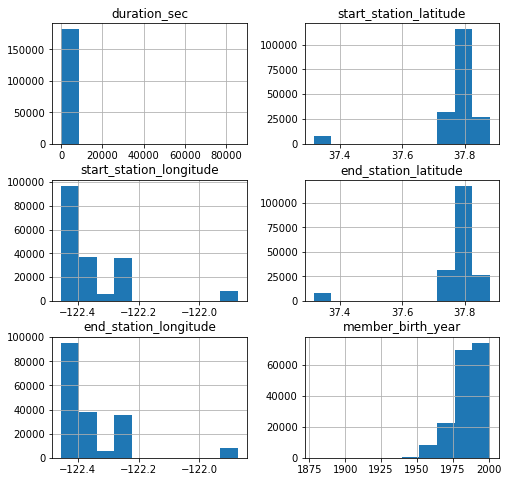

In [11]:
df_copy.hist(figsize=(8,8))

#### from the above graghs there are some variables which have outliters, hence cleaning process will be taken 

In [12]:
#check if there is nan in the data 
df_copy.isnull().values.any()

True

In [13]:
df_copy.dropna(inplace=True)

In [14]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_name       174952 non-null  object 
 4   start_station_latitude   174952 non-null  float64
 5   start_station_longitude  174952 non-null  float64
 6   end_station_name         174952 non-null  object 
 7   end_station_latitude     174952 non-null  float64
 8   end_station_longitude    174952 non-null  float64
 9   user_type                174952 non-null  object 
 10  member_birth_year        174952 non-null  float64
 11  member_gender            174952 non-null  object 
 12  bike_share_for_all_trip  174952 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 18.7+ MB


In [15]:
#make one column with distnce instead of 4 columns of latitude and longitude 
df_copy['Distance_of_trip'] = np.vectorize(dist)(df_copy['start_station_latitude'],df_copy['start_station_longitude'],df_copy['end_station_latitude'],df_copy['end_station_longitude'])
df_copy.head()

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Distance_of_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Commercial St at Montgomery St,37.794231,-122.402923,Customer,1984.0,Male,No,0.544879
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,Market St at Dolores St,37.769305,-122.426826,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,Customer,1972.0,Male,No,2.705394
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,Grove St at Masonic Ave,37.774836,-122.446546,Central Ave at Fell St,37.773311,-122.444293,Subscriber,1989.0,Other,No,0.260820
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,Frank H Ogawa Plaza,37.804562,-122.271738,10th Ave at E 15th St,37.792714,-122.248780,Subscriber,1974.0,Male,Yes,2.410058
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,4th St at Mission Bay Blvd S,37.770407,-122.391198,Broadway at Kearny,37.798014,-122.405950,Subscriber,1959.0,Male,No,3.333249


In [16]:
#drop the latitude and the longtidude of start and end points as we create new column 
df_copy.drop(columns=['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'],inplace=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_name       174952 non-null  object 
 4   end_station_name         174952 non-null  object 
 5   user_type                174952 non-null  object 
 6   member_birth_year        174952 non-null  float64
 7   member_gender            174952 non-null  object 
 8   bike_share_for_all_trip  174952 non-null  object 
 9   Distance_of_trip         174952 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 14.7+ MB


In [17]:
#convert member_birth_year to int type and start and end time to date and time type 
df_copy['member_birth_year']=df_copy['member_birth_year'].astype(int)

In [18]:
df_copy['start_time'] = pd.to_datetime(df['start_time'] )
df_copy['end_time'] = pd.to_datetime(df['end_time'])

In [19]:
#for check 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   end_station_name         174952 non-null  object        
 5   user_type                174952 non-null  object        
 6   member_birth_year        174952 non-null  int32         
 7   member_gender            174952 non-null  object        
 8   bike_share_for_all_trip  174952 non-null  object        
 9   Distance_of_trip         174952 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int32(1), int64(1), object(5)
memory usage: 14.0+ MB


In [20]:
df_copy.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Distance_of_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984,Male,No,0.544879
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972,Male,No,2.705394
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989,Other,No,0.260820
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974,Male,Yes,2.410058
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,1959,Male,No,3.333249


In [21]:
# extract hour and month from the Start Time column to create a hour column and a month column
df_copy['shour'] = df_copy['start_time'].dt.hour
df_copy['smonth']=df_copy['start_time'].dt.month

In [22]:
#extract weekday from start_time column to create a day column 
df_copy['sday']=df_copy['start_time'].dt.weekday
df_copy['sday']=df_copy['sday'].replace([0,1,2,3,4,5,6],['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'])

In [23]:
#check
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   end_station_name         174952 non-null  object        
 5   user_type                174952 non-null  object        
 6   member_birth_year        174952 non-null  int32         
 7   member_gender            174952 non-null  object        
 8   bike_share_for_all_trip  174952 non-null  object        
 9   Distance_of_trip         174952 non-null  float64       
 10  shour                    174952 non-null  int64         
 11  smonth                   174952 non-null  int64         
 12  sday            

In [24]:
#here is the final structure of the data set 
df_copy.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Distance_of_trip,shour,smonth,sday
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984,Male,No,0.544879,17,2,Tuesday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972,Male,No,2.705394,12,2,Tuesday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989,Other,No,0.260820,17,2,Tuesday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974,Male,Yes,2.410058,23,2,Tuesday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,1959,Male,No,3.333249,23,2,Tuesday


### What is the most gender appeared in this dataset?

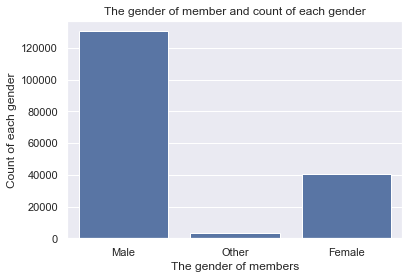

In [50]:
#type of genders and their counts 
base_color=sb.color_palette()[0]
ax=sb.countplot(x='member_gender',data = df_copy , color=base_color)
ax.set_title('The gender of member and count of each gender')
ax.set(xlabel='The gender of members', ylabel='Count of each gender');

##### THe above gragh shows that the most gender in this case study Male type with count more than 120000 users,the second is the female with count more than 40000 userss  and the other users_gender is less than 20000 userss.

### Which was the mot start trip station did the users got start for there trips?

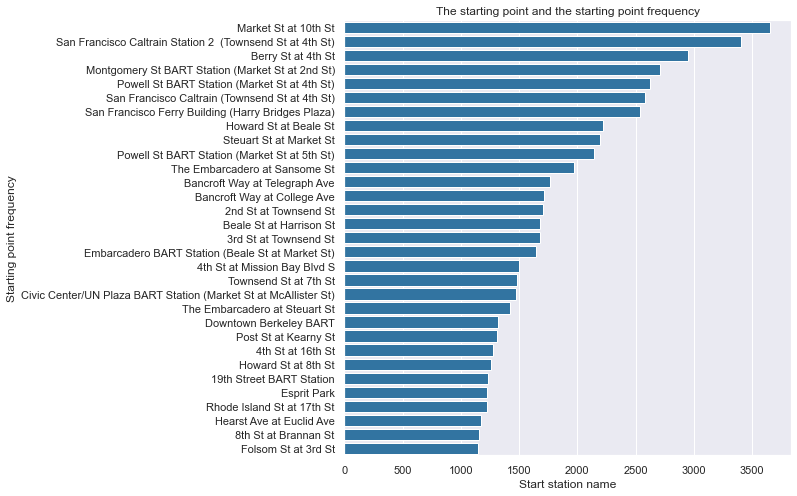

In [46]:
start=df_copy['start_station_name'].value_counts().index[0:31]
fig_dims = (8,8)
fig = plt.subplots(figsize=fig_dims)
ax=sb.countplot(y='start_station_name',data = df_copy , color=base_color,order=start)
ax.set_title('The starting point and the starting point frequency')
ax.set(xlabel='Start station name', ylabel='Starting point frequency');

##### from the above gragh the most start station in which the users start their trip is (Market St at 10th st) with more than 3500 times 

### Which was the mot end trip station did the users end  there trips?

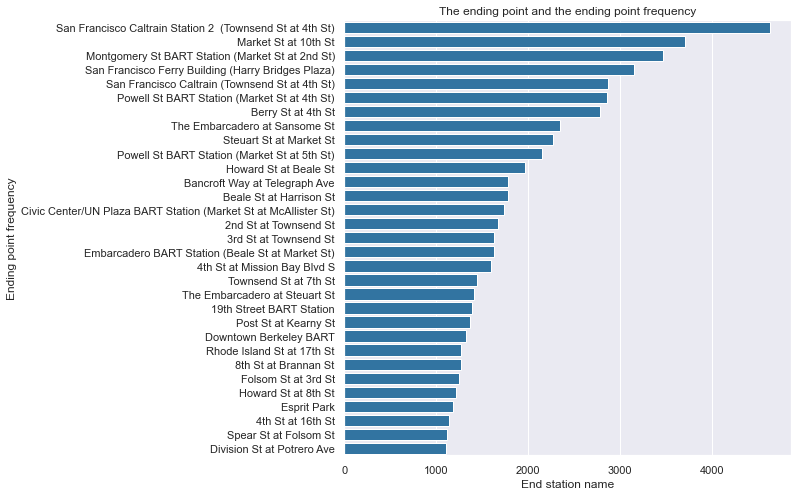

In [45]:
end=df_copy['end_station_name'].value_counts().index[0:31]
fig_dims = (8,8)
fig = plt.subplots(figsize=fig_dims)
ax=sb.countplot(y='end_station_name',data = df_copy , color=base_color,order=end)
ax.set_title('The ending point and the ending point frequency')
ax.set(xlabel='End station name', ylabel='Ending point frequency');

##### from the above gragh the most end station in which the users end their trips is (San Francisco Caltrain Station 2  (Townsend St at 4th St) ) with more than 4000 times

### Who has more members customers or subscribers?

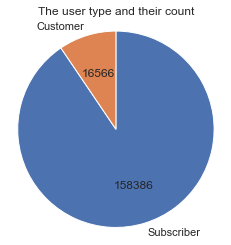

In [47]:
#type of member
sorted_counts = df_copy['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,autopct=autopct_format(sorted_counts))
plt.axis('square')
plt.title('The user type and their count');


##### the above graph the most user type in this case study  is the Subscriber type with count more than 140000 users(158386 users) while the customer with count less than 20000 users (16566 users)

### Are bike sharing for all trip is more or not bike sharing?

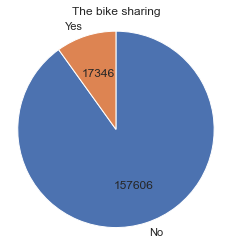

In [48]:
#bike_share_for_all_trip
sorted_counts = df_copy['bike_share_for_all_trip'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,autopct=autopct_format(sorted_counts))
plt.axis('square')
plt.title('The bike sharing');


##### for the above graph it shows that more than 140000(157606 users) members don't  bike share for all trip while less than 20000 users(17346 users) members share bike for all trip 

In [30]:
#change the values of birth year with string format for ease of exploration 
df_copy['member_birth_year']=df_copy['member_birth_year'].replace([1878,1900,1901,1902],'before 1910s')
df_copy['member_birth_year']=df_copy['member_birth_year'].replace([1910],'10s')
df_copy['member_birth_year']=df_copy['member_birth_year'].replace([i for i in range(1920,1930)],'1920s')
df_copy['member_birth_year']=df_copy['member_birth_year'].replace([i for i in range(1930,1940)],'1930s')
df_copy['member_birth_year']=df_copy['member_birth_year'].replace([i for i in range(1940,1950)],'1940s')
df_copy['member_birth_year']=df_copy['member_birth_year'].replace([i for i in range(1950,1960)],'1950s')

In [31]:
df_copy['member_birth_year']=df_copy['member_birth_year'].replace([i for i in range(1960,1970)],'1960s')
df_copy['member_birth_year']=df_copy['member_birth_year'].replace([i for i in range(1970,1980)],'1970s')
df_copy['member_birth_year']=df_copy['member_birth_year'].replace([i for i in range(1980,1990)],'1980s')
df_copy['member_birth_year']=df_copy['member_birth_year'].replace([i for i in range(1990,2000)],'1990s')
df_copy['member_birth_year']=df_copy['member_birth_year'].replace([i for i in range(2000,2002)],'2000s')

### Which generation is the most to use fordgobike?

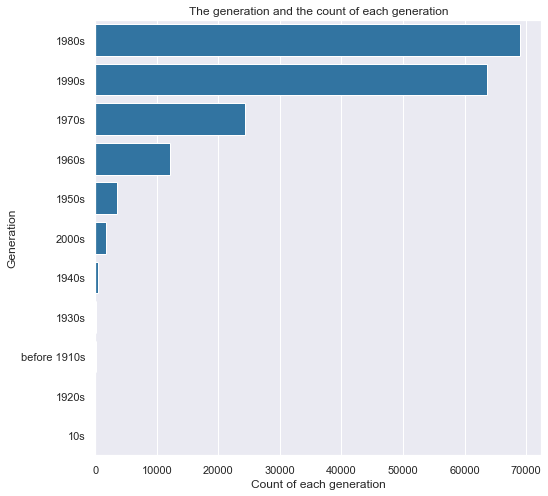

In [49]:
year= df_copy.member_birth_year.value_counts().index
fig_dims = (8,8)
fig = plt.subplots(figsize=fig_dims)
ax=sb.countplot(y='member_birth_year',data = df_copy , color=base_color,order=year)
ax.set_title('The generation and the count of each generation')
ax.set(xlabel='Count of each generation', ylabel='Generation');

##### from the above figure the most generation use the fordgobike is the 1980s with count more than 60000 users 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I had discussed some variables which are (member type , member  birth year , member gender,start and end station names,start and end coordinates(latitude and longtitude) and bike share for all trip),the most type of the member is the Subscriber type with count more than 160000 , the most gender is the male type with count more than 120000 members , the most generation use the fordgobike is the 1980s with count more than 60000 users and,the most strarting piont users start their trip is (Market St at 10th st), the most end station which users end their trip is called (San Francisco Caltrain Station 2 (Townsend St at 4th St) ) more than 140000 members don't bike share for all trip.
>There was  unusual pionts  and Yes i needed tp perform transfrmations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, i perform some cleaning issues due to  outliters in some variables like both start and end  station latitude and longtitude to be in one column which is the distance of the whole trip also change the type of start and end time to timedelta , member birth year to int, also chnge the values of birth year to be generation  and drop missing value for make the data tidy whhich is essential issue for visualization.  

## Bivariate Exploration

### Which weekday has the longest trip duration on average?

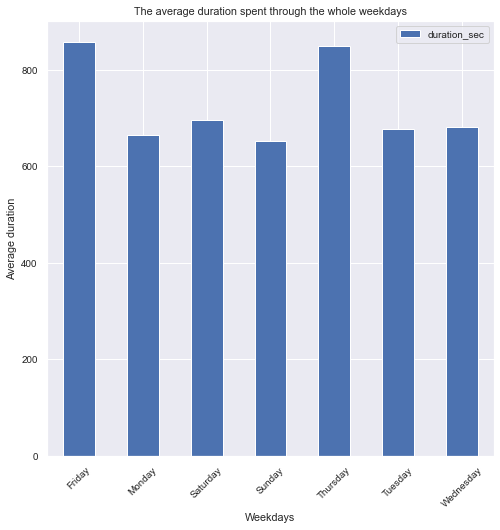

In [33]:
s=df_copy.groupby('sday').duration_sec.mean()
s=s.to_frame()
sb.set(font_scale=0.9) 
fig, ax = plt.subplots(figsize=(8,8))
ax=s.plot(ax=ax,kind='bar',rot=45)
ax.set_title('The average duration spent through the whole weekdays')
ax.set(xlabel='Weekdays', ylabel='Average duration');

##### From the above gragh, the day which has in average the longest duration of  a trip is Friday with average duration more than 800 sec 

### Which user type spent longer duration ?customers or subscriber?

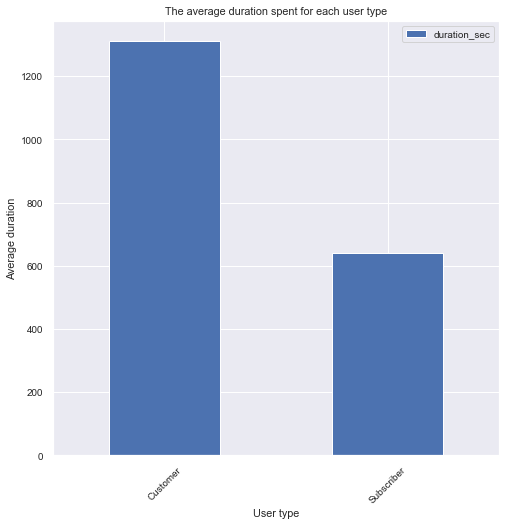

In [34]:
#to visualize 
s=df_copy.groupby('user_type').duration_sec.mean()
s=s.to_frame()
sb.set(font_scale=0.9) 
fig, ax = plt.subplots(figsize=(8,8))
ax=s.plot(ax=ax,kind='bar',rot=45)
ax.set_title('The average duration spent for each user type')
ax.set(xlabel='User type', ylabel='Average duration');

##### From the above grapgh the Customers is spent in average more than 1200 secs than the Subscribers 

### Which day has the most distance trip covered on average?

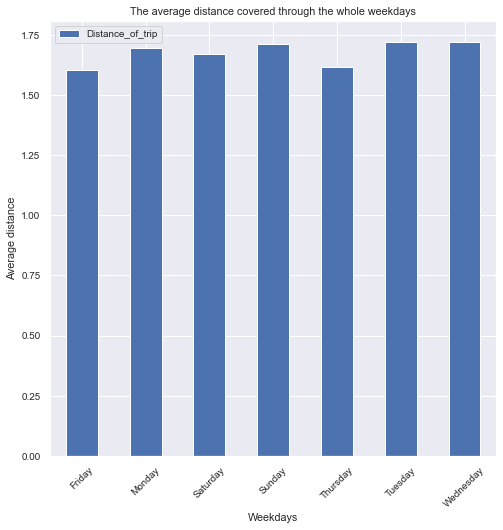

In [35]:
s=df_copy.groupby('sday').Distance_of_trip.mean()
s=s.to_frame()
sb.set(font_scale=0.9) 
fig, ax = plt.subplots(figsize=(8,8))
ax=s.plot(ax=ax,kind='bar',rot=45)
ax.set_title('The average distance covered through the whole weekdays')
ax.set(xlabel='Weekdays', ylabel='Average distance');

##### From the above graph Wednesday and tuesdaty are the days which average distance had made by more than 1.5 kg 

### Which gender could share their bike?and which could not share their bike?

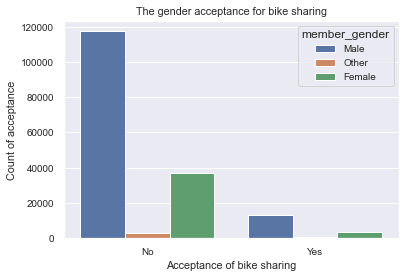

In [36]:
ax=sb.countplot(data = df_copy, x = 'bike_share_for_all_trip', hue = 'member_gender')
ax.set_title('The gender acceptance for bike sharing')
ax.set(xlabel='Acceptance of bike sharing', ylabel='Count of acceptance');

#####  From the above graph, it shows that male type is the the most gender type which both share the bike and don't share also but almost they don't share thier bike for all trips 

### Which gender is  a customer? and which gender is a subscriber?

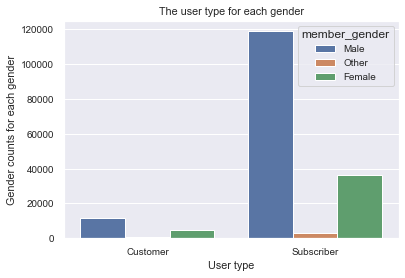

In [37]:
ax=sb.countplot(data = df_copy, x = 'user_type', hue = 'member_gender')
ax.set_title('The user type for each gender')
ax.set(xlabel='User type', ylabel='Gender counts for each gender');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There are many relationships i observed in this part of the investigation like: the relation between average duration with the weekdays it declared that friday is the day which had longest duration for trips with average more than 800 secs,alo  the duration between the user type and the duration of trips it declared that the customers  spent longer time than the subscribers spent with average more than 1200 secs, also the relation between the duration and distance of the trip, it declared that wednseday was the day which had the longest average distance of trip with average more than 1.5 kg,also the relation between the bike sharing and member gender, first of all at this relation the number of members which didn't share the bike were more than the members share the bike and the gender in both sides are the most and the relation between the user_type and the gender of members which declared that the number of male subscriber is more than any other than gender in customers or in subscribers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, like the relation between user_type and member gender, the relation between weekdays, the relation between member genderand bike sharing and duration of trip and the relation between weekdays and distance of the trip.

## Multivariate Exploration

### Are the customers spend more in trip or the subscribers?

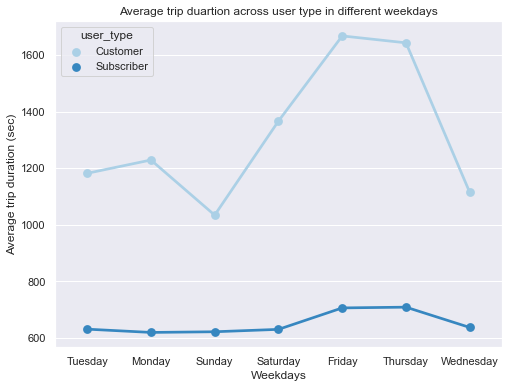

In [38]:
fig = plt.figure(figsize = [8,6])
sb.set(font_scale=1)
sb.pointplot(data = df_copy, x = 'sday', y = 'duration_sec', hue = 'user_type', palette = 'Blues', ci=None)
plt.title('Average trip duartion across user type in different weekdays')
plt.ylabel('Average trip duration (sec)')
plt.xlabel('Weekdays')
plt.show();

#####  the above gragh decribe the relation between average trip duration and user type  in different weekdays

### Are the customers spend more in trip than the subscribers?

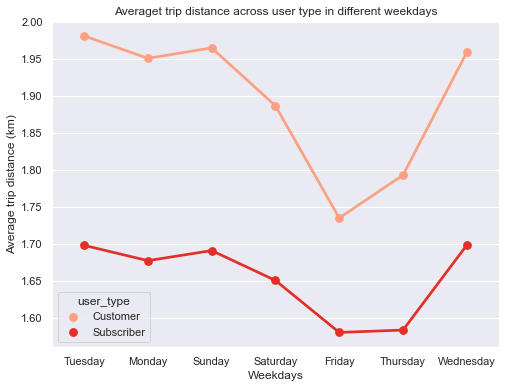

In [39]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_copy, x = 'sday', y = 'Distance_of_trip', hue = 'user_type', palette = 'Reds', ci=None)
plt.title('Averaget trip distance across user type in different weekdays')
plt.ylabel('Average trip distance (km)')
plt.xlabel('Weekdays')
plt.show();

##### the above gragh decribe the relation between average trip distance and user type in different weekdays

### Are the customers travel more in trip than the subscribers?

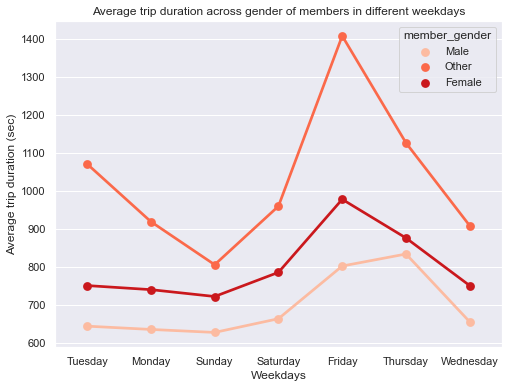

In [40]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_copy, x = 'sday', y = 'duration_sec', hue = 'member_gender', palette = 'Reds', ci=None)
plt.title('Average trip duration across gender of members in different weekdays')
plt.ylabel('Average trip duration (sec)')
plt.xlabel('Weekdays')
plt.show();

##### the above gragh decribe the relation between average trip duration and gender of members in different weekdays

### Which gender traveled more through the weekdays?

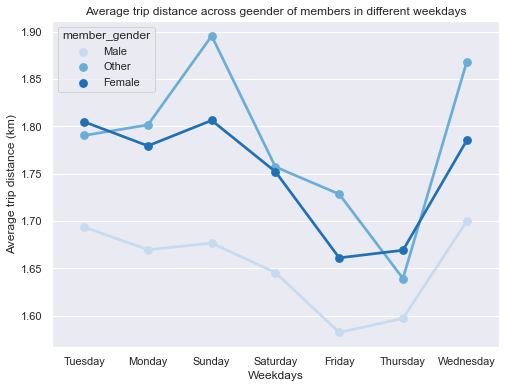

In [41]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_copy, x = 'sday', y = 'Distance_of_trip', hue = 'member_gender', palette = 'Blues', ci=None)
plt.title('Average trip distance across geender of members in different weekdays')
plt.ylabel('Average trip distance (km)')
plt.xlabel('Weekdays')
plt.show();

##### the above gragh decribe the relation between average trip distance and gender of members in different weekdays

### Whether bike sharing could affect on the duration trip or not?

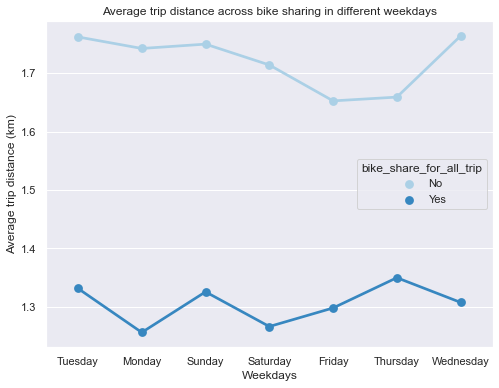

In [42]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_copy, x = 'sday', y = 'Distance_of_trip', hue = 'bike_share_for_all_trip', palette = 'Blues', ci=None)
plt.title('Average trip distance across bike sharing in different weekdays')
plt.ylabel('Average trip distance (km)')
plt.xlabel('Weekdays')
plt.show();

##### the above gragh decribe the relation between average trip distance and bike sharing in different weekdays

### Whether bike sharing affect on the distance of the trip or not?

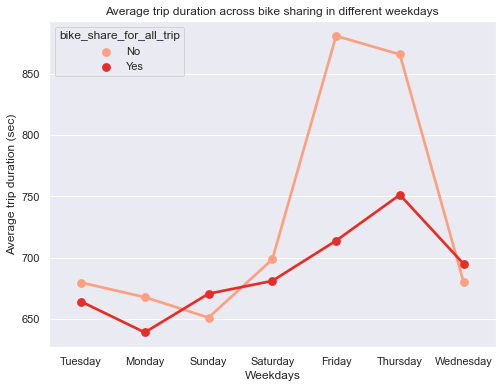

In [43]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_copy, x = 'sday', y = 'duration_sec', hue = 'bike_share_for_all_trip', palette = 'Reds', ci=None)
plt.title('Average trip duration across bike sharing in different weekdays')
plt.ylabel('Average trip duration (sec)')
plt.xlabel('Weekdays')
plt.show();

##### the above gragh decribe the relation between average trip duration and bike sharing in different weekdays

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There are many relationships in this this sector, the first one is between Average trip duartion across user type in different weekdays which declared that the average trip duration through the whole weekdays for customers was more than that of subscribers, the second one is the average trip distance across user type in different weekdays which declared that the average trip distance for the customers was more than that in the subscribers, the third one is the average trip duration across gender of members in different weekdays it showed that male spent in average  trip duration more than any gender, the fourth one is the average trip distance across gender of members in different weekdays which showed that the male the male made in average distance more than any gender,the fifth one is the average trip distance across bike sharing in different weekdays which showed that wirhout bie sharing the average distance could be bigger than that in sharing bike and the last one is the average trip duration across bike sharing in different weekdays which showed that on average without bike sharing the average trip duration is smaller than that with bike sharing.

### Were there any interesting or surprising interactions between features?

> Yes there were surprising interactions like the averge trip distance across bike sharing in different weekdays and the average trip duration across bike sharing in different weekdays , it might think that with bike sharing the distnce and the duration could incrase the distance and the duration but the opposite is right.

In [44]:
# i make a copy for explantory 
df_copy.to_csv('df_copy',index=False)